In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [24]:
data = pd.read_csv("marketing_campaign.csv",delimiter=";")

In [25]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [26]:
data = data.dropna()
# try the process of converting 'y' into binary and creating dummy variables
data['y'] = data['y'].map({'no': 0, 'yes': 1})

In [27]:
# define the categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Convert categorical variables into dummy variables
data_dummies = pd.get_dummies(data, columns=categorical_cols)

# Split the dataset into training and testing samples
train_data, test_data = train_test_split(data_dummies, test_size=1/3, random_state=42)

# Separate the features and the target variable for both training and testing sets
X_train = train_data.drop('y', axis=1)
y_train = train_data['y']
X_test = test_data.drop('y', axis=1)
y_test = test_data['y']

# Display the first few rows of the training features and target to verify
X_train.head(), y_train.head()


(       age  balance  day  duration  campaign  pdays  previous  job_admin.  \
 5915    59     -247   26       131         1     -1         0       False   
 26602   37     1624   20       559         2     -1         0       False   
 42039   55    13578   29       247         2     -1         0       False   
 17708   27       36   29       114         4     -1         0       False   
 10465   29      573   16       190         4     -1         0       False   
 
        job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  \
 5915             False             False  ...      False      False   
 26602            False             False  ...      False      False   
 42039            False             False  ...      False      False   
 17708             True             False  ...      False      False   
 10465            False             False  ...       True      False   
 
        month_may  month_nov  month_oct  month_sep  poutcome_failure  \
 5915        True      F

In [11]:
#question1

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

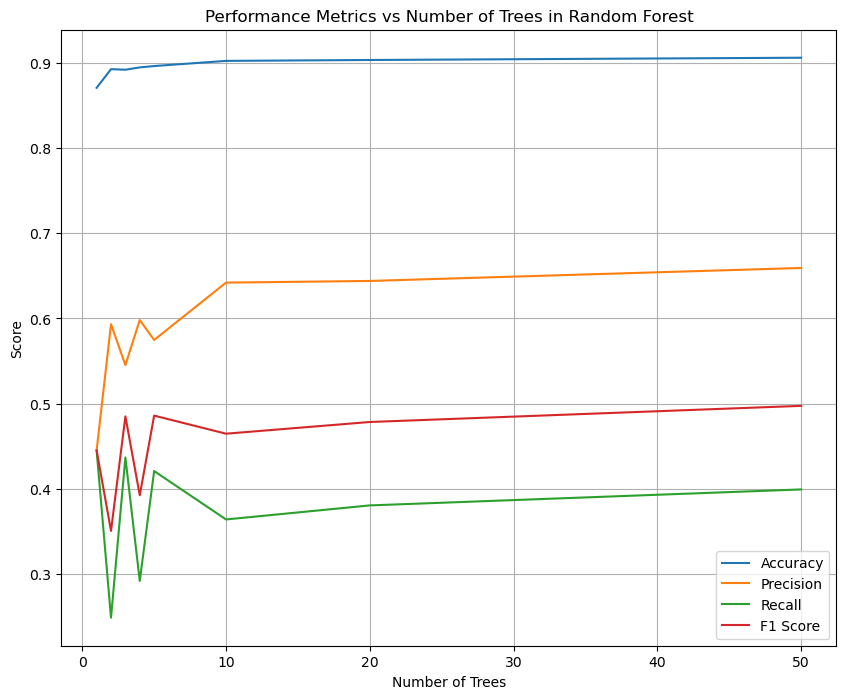

In [28]:
# Initialize lists to store the metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []
n_trees_range = [1, 2, 3, 4, 5, 10, 20, 50]

# Fit the random forest model with varying number of trees and calculate metrics
#here max_feautures ="sqrt" is to ensure that rf picks a random subset of m=squared_p features at
#at each split
for n_trees in n_trees_range:
    rf = RandomForestClassifier(n_estimators=n_trees, max_features='sqrt', random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    # Calculate and collect the metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Plot the metrics
plt.figure(figsize=(10, 8))
plt.plot(n_trees_range, accuracies, label='Accuracy')
plt.plot(n_trees_range, precisions, label='Precision')
plt.plot(n_trees_range, recalls, label='Recall')
plt.plot(n_trees_range, f1_scores, label='F1 Score')
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.title('Performance Metrics vs Number of Trees in Random Forest')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
#According to the plot, we can noticed that increasing number of trees can 
#improve the model performance shortly, but the gain will diminish after the 
#number of trees exceeds certain thrshold.

In [30]:
#question2

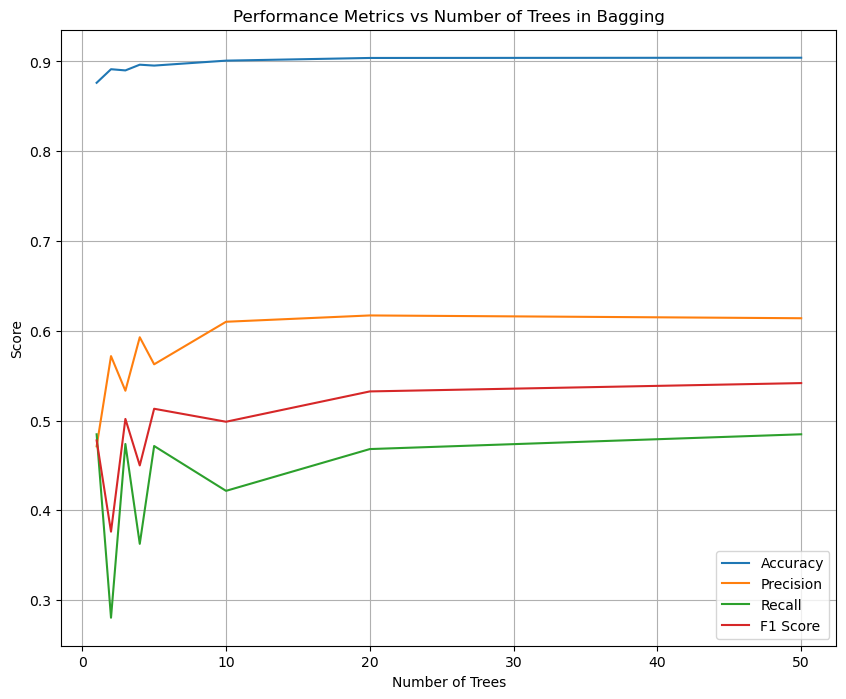

In [31]:
#bagging basically means that when building each base estimator, the algorithm has the option 
#to consider all p features for splitting at each node, rather than squared_p
#as before
from sklearn.ensemble import BaggingClassifier

# Initialize lists to store the metrics for bagging
bagging_accuracies = []
bagging_precisions = []
bagging_recalls = []
bagging_f1_scores = []

# Fit the Bagging model with varying number of trees and calculate metrics
for n_trees in n_trees_range:
    bagging_clf = BaggingClassifier(n_estimators=n_trees, random_state=42, n_jobs=-1)
    bagging_clf.fit(X_train, y_train)
    y_pred_bagging = bagging_clf.predict(X_test)
    
    # Calculate and collect the metrics
    bagging_accuracies.append(accuracy_score(y_test, y_pred_bagging))
    bagging_precisions.append(precision_score(y_test, y_pred_bagging, pos_label=1))
    bagging_recalls.append(recall_score(y_test, y_pred_bagging, pos_label=1))
    bagging_f1_scores.append(f1_score(y_test, y_pred_bagging, pos_label=1))

# Plot the metrics for bagging
plt.figure(figsize=(10, 8))
plt.plot(n_trees_range, bagging_accuracies, label='Accuracy')
plt.plot(n_trees_range, bagging_precisions, label='Precision')
plt.plot(n_trees_range, bagging_recalls, label='Recall')
plt.plot(n_trees_range, bagging_f1_scores, label='F1 Score')
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.title('Performance Metrics vs Number of Trees in Bagging')
plt.legend()
plt.grid(True)
plt.show()



In [32]:
#question3

In [34]:
#choose the best_performing model
#the model with the highest F1 score as it balances precision and recall
print(f1_scores)
print(bagging_f1_scores)

[0.4452015900056786, 0.35091926458832934, 0.48519218651543794, 0.3926801372474266, 0.4860792662954471, 0.46488052136133234, 0.47860199714693297, 0.4975265017667845]
[0.4778959149412423, 0.37623762376237624, 0.5018028846153846, 0.45, 0.513121333744983, 0.4986577181208054, 0.5324298160696999, 0.5417063114494133]


In [35]:
#here we can notice that for the bagging model and the number of trees 5, the
#f1 score is pretty high as 0.51. Even though when the number of trees 
#increase to 20,50, which is better from aspect of model performance, 
#considering the computation cost, here we still choose bagging classifier and 
#number of trees equal to 5. 

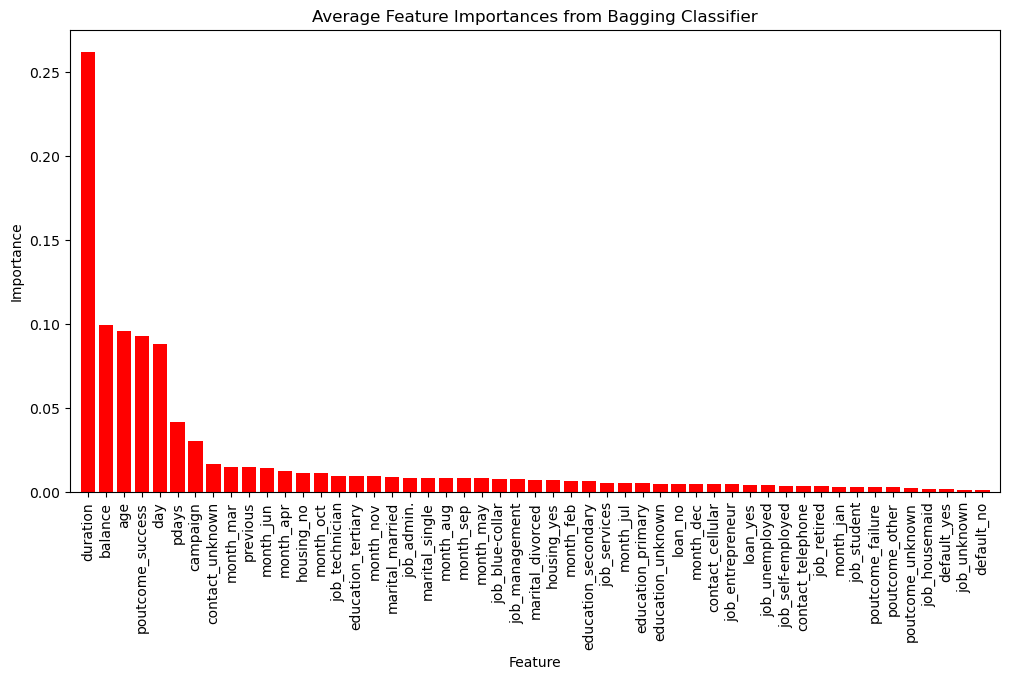

('duration', 0.26217811907278304)

In [39]:
# Fit the Bagging classifier with 5 trees
bagging_best = BaggingClassifier(n_estimators=5, random_state=42)
bagging_best.fit(X_train, y_train)

# Since BaggingClassifier consists of an ensemble of estimators, we can retrieve
# each individual tree's feature_importances_ and then average them
individual_importances = [tree.feature_importances_ for tree in bagging_best.estimators_]
average_importances = np.mean(individual_importances, axis=0)

# Plot the average feature importances
indices = np.argsort(average_importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Average Feature Importances from Bagging Classifier')
plt.bar(range(X_train.shape[1]), average_importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Show the most important feature according to the bagging model
X_train.columns[indices[0]], average_importances[indices[0]]

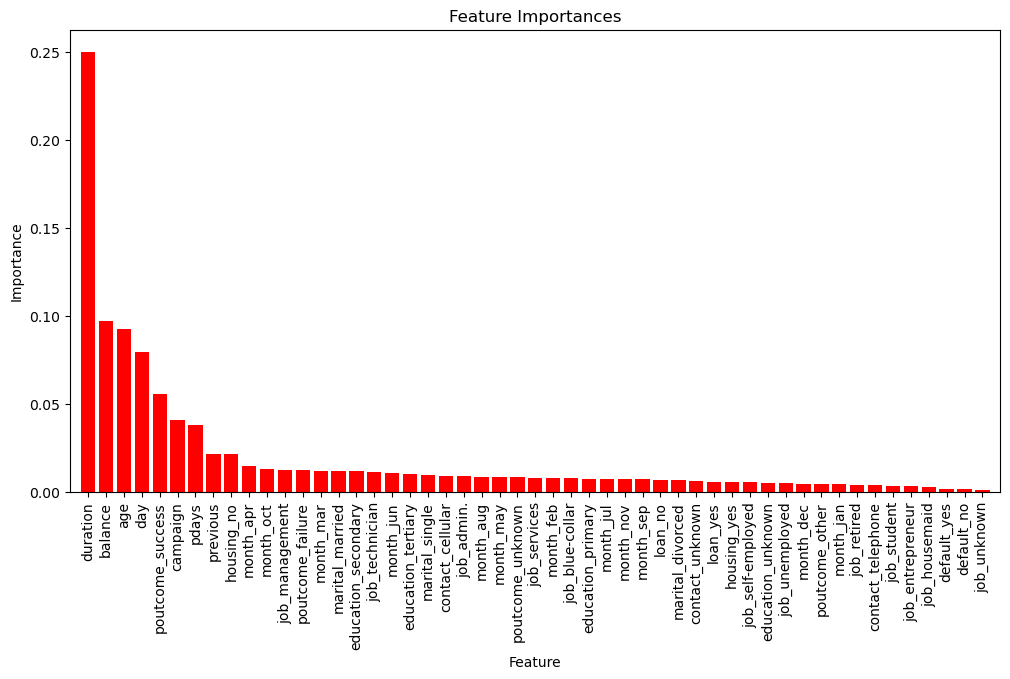

('duration', 0.2500985222295879)

In [36]:
#According to question, here we also use the randomforest classifier w the best number of trees 5.
best_n_trees = 5

# Fit the RandomForestClassifier with the chosen number of trees
best_rf = RandomForestClassifier(n_estimators=best_n_trees, max_features='sqrt', random_state=42)
best_rf.fit(X_train, y_train)

# Get feature importances
importances = best_rf.feature_importances_

# Plot feature importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Show the most important feature
X_train.columns[indices[0]], importances[indices[0]]


In [37]:
#The feature 'duration' is the most dominant one, with an importance score of approximately 0.25, 
#indicating that it has a significant impact on the model's predictions. This suggests that the length of
#the last contact duration with a client is a strong predictor for whether a client will subscribe to a term deposit.

In [38]:
#question4

In [ ]:
#The first reason is: each individual decision tree in the ensemble can have high variance, when the number of trees is 
#small. With very few trees, the ensemble is more sensitive to the idiosyncrasies of each individual tree.
#The second reason is: with very few trees, the model might overfit to noise in the training data instead of capturing 
#the underlying pattern, leading to variability in performance.
#The third reason is: with a small number of trees, it's more likely that none of the trees 
#are representative of the true underlying pattern, leading to fluctuating performance as more trees are added.
